In [1]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter


In [2]:
df_fuel_statewide = pd.read_excel('../../../data/raw/ce2.1.st.xlsx', sheet_name="physical units")
df_household_fuel = pd.read_excel('../../../data/raw/ACSDP5Y2020.DP04-2023-10-24T140337.xlsx', sheet_name="Data")
df_household_fuel_five_towns = pd.read_excel('../../../data/raw/ACSDP5Y2020.DP04-2024-01-09T103316.xlsx', sheet_name="Data")

In [3]:
fuel = df_fuel_statewide.iloc[12,:]
name = df_fuel_statewide.iloc[2,:]

In [4]:
name = df_fuel_statewide.iloc[2,:]

In [5]:
fuel_statewide = pd.concat([name, fuel], axis=1)
# Extract the first 3 rows
total_fuel = fuel_statewide.iloc[2:6]

In [6]:
total_fuel 

,2,12
Unnamed: 2,Electricity (billion kWh),10.8
Unnamed: 3,Natural gas (billion cf),36.9
Unnamed: 4,Propane (million gallons),54.3
Unnamed: 5,Fuel oil or kerosene (million gallons),345.7


In [7]:
total_fuel = total_fuel.reset_index(drop=True)

In [8]:
natural_gas_CT = total_fuel.iat[1,1]
propane_CT = total_fuel.iat[2,1]
oil_CT = total_fuel.iat[3,1]

In [9]:
#extract the number of household
df_household_fuel = df_household_fuel.iloc[72:76]
df_household_fuel = df_household_fuel[['Unnamed: 0', 'Connecticut', 'Bridgeport-Stamford-Norwalk, CT Metro Area', 'Hartford-East Hartford-Middletown, CT Metro Area','New Haven-Milford, CT Metro Area']]

In [10]:
df_household_fuel.columns = df_household_fuel.columns.str.replace('Unnamed: 0', 'Fuel type')
df_household_fuel = df_household_fuel.reset_index(drop=True)

In [11]:
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area"
0,Utility gas,"495,646","140,147","190,541","134,167"
1,"Bottled, tank, or LP gas","64,356","15,254","21,596","11,823"
2,Electricity,"232,659","57,830","72,985","60,650"
3,"Fuel oil, kerosene, etc.","551,817","125,962","178,163","119,116"


In [12]:
#extract the number of household
df_household_fuel_five_towns = df_household_fuel_five_towns.iloc[72:76]
df_household_fuel_five_towns = df_household_fuel_five_towns[['Unnamed: 0', 'Bridgewater town, Litchfield County, Connecticut', 'New Milford town, Litchfield County, Connecticut', 'Colchester town, New London County, Connecticut','Lyme town, New London County, Connecticut','Old Lyme town, New London County, Connecticut']]
df_household_fuel_five_towns.columns = df_household_fuel_five_towns.columns.str.replace('Unnamed: 0', 'Fuel type')
df_household_fuel_five_towns = df_household_fuel_five_towns.reset_index(drop=True)
df_household_fuel_five_towns = df_household_fuel_five_towns.drop(2)

In [13]:
df_household_fuel_five_towns
# Convert string values to numeric in specified columns
columns_to_convert = df_household_fuel_five_towns.columns[1:]
df_household_fuel_five_towns[columns_to_convert] = df_household_fuel_five_towns[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))
df_household_fuel_five_towns

,Fuel type,"Bridgewater town, Litchfield County, Connecticut","New Milford town, Litchfield County, Connecticut","Colchester town, New London County, Connecticut","Lyme town, New London County, Connecticut","Old Lyme town, New London County, Connecticut"
0,Utility gas,12,174,146,19,76
1,"Bottled, tank, or LP gas",81,586,838,146,324
3,"Fuel oil, kerosene, etc.",544,6133,4183,697,1933


In [14]:
df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"] = df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"].str.replace(',', '')
df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"] = df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"].str.replace(',', '')
df_household_fuel["New Haven-Milford, CT Metro Area"] = df_household_fuel["New Haven-Milford, CT Metro Area"].str.replace(',', '')
df_household_fuel["Connecticut"] = df_household_fuel["Connecticut"].str.replace(',', '')

df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area"
0,Utility gas,495646,140147,190541,134167
1,"Bottled, tank, or LP gas",64356,15254,21596,11823
2,Electricity,232659,57830,72985,60650
3,"Fuel oil, kerosene, etc.",551817,125962,178163,119116


In [15]:
df_household_fuel = df_household_fuel.drop(2)
# Convert string values to numeric in specified columns
columns_to_convert = df_household_fuel.columns[1:]
df_household_fuel[columns_to_convert] = df_household_fuel[columns_to_convert].apply(lambda x: pd.to_numeric(x.str.replace(',', ''), errors='coerce'))
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area"
0,Utility gas,495646,140147,190541,134167
1,"Bottled, tank, or LP gas",64356,15254,21596,11823
3,"Fuel oil, kerosene, etc.",551817,125962,178163,119116


In [16]:
df_household_fuel_five_towns['Litchfield']=df_household_fuel_five_towns['Bridgewater town, Litchfield County, Connecticut']+df_household_fuel_five_towns['New Milford town, Litchfield County, Connecticut']
df_household_fuel_five_towns['New London']=df_household_fuel_five_towns['Colchester town, New London County, Connecticut']+df_household_fuel_five_towns['Lyme town, New London County, Connecticut']+df_household_fuel_five_towns['Old Lyme town, New London County, Connecticut']
df_household_fuel_five_towns

,Fuel type,"Bridgewater town, Litchfield County, Connecticut","New Milford town, Litchfield County, Connecticut","Colchester town, New London County, Connecticut","Lyme town, New London County, Connecticut","Old Lyme town, New London County, Connecticut",Litchfield,New London
0,Utility gas,12,174,146,19,76,186,241
1,"Bottled, tank, or LP gas",81,586,838,146,324,667,1308
3,"Fuel oil, kerosene, etc.",544,6133,4183,697,1933,6677,6813


In [17]:
df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']=df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']+df_household_fuel_five_towns['Litchfield']
df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']=df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']+df_household_fuel_five_towns['New London']
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area"
0,Utility gas,495646,140333,190782,134167
1,"Bottled, tank, or LP gas",64356,15921,22904,11823
3,"Fuel oil, kerosene, etc.",551817,132639,184976,119116


In [18]:
df_household_fuel["BSN relative to the statewide"] = df_household_fuel["Bridgeport-Stamford-Norwalk, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel["HEM relative to the statewide"] = df_household_fuel["Hartford-East Hartford-Middletown, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel["NHM relative to the statewide"] = df_household_fuel["New Haven-Milford, CT Metro Area"].astype(int)/df_household_fuel["Connecticut"].astype(int)
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712
3,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861


In [19]:
# Create a dictionary containing sample data
data = {
    'Energy type': ['Natural gas (g (Gas)/scf)','Propane (g (Gas)/gallon)', 'Fuel oil (g (Gas)/gallon'],
    'CO2': [54.44, 5720, 10150],
    'CH4': [0, 0.27, 0.41],
    'N2O': [0,0.05,0.08]
}

# Create a DataFrame from the dictionary
emissions_factor = pd.DataFrame(data)

# Display the DataFrame
print(emissions_factor)

                 Energy type       CO2   CH4   N2O
0  Natural gas (g (Gas)/scf)     54.44  0.00  0.00
1   Propane (g (Gas)/gallon)   5720.00  0.27  0.05
2   Fuel oil (g (Gas)/gallon  10150.00  0.41  0.08


In [20]:
# calculate the total amount of fuel consumption in each MSA
natural_gas_CT = total_fuel.iat[1,1]
propane_CT = total_fuel.iat[2,1]
oil_CT = total_fuel.iat[3,1]
df_household_fuel["Statewide Energy consumption"]=[natural_gas_CT*1000,propane_CT,oil_CT]

In [21]:
df_household_fuel["BSN Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["BSN relative to the statewide"]
df_household_fuel["HEM Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["HEM relative to the statewide"]
df_household_fuel["NHM Energy consumption"] = df_household_fuel["Statewide Energy consumption"]*df_household_fuel["NHM relative to the statewide"]
df_household_fuel ["Energy consumption unit"] = ["million cf","million gallons","million gallons"]

In [22]:
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide,Statewide Energy consumption,BSN Energy consumption,HEM Energy consumption,NHM Energy consumption,Energy consumption unit
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691,36900.0,10447.552689,14203.394762,9988.504497,million cf
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712,54.3,13.433251,19.325117,9.975587,million gallons
3,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861,345.7,83.095124,115.882989,74.623292,million gallons


In [23]:
df_household_fuel["Emissions factor unit"] = ["g (Gas)/scf","g (Gas)/gallon","g (Gas)/gallon"]
df_household_fuel["CO2"] = [54.44,5720,10150]
df_household_fuel["CH4"] = [0,0.27,0.41]
df_household_fuel ["N2O"] = [0,0.05,0.08]

In [24]:
df_household_fuel.reset_index(drop=True, inplace=True)
df_household_fuel

,Fuel type,Connecticut,"Bridgeport-Stamford-Norwalk, CT Metro Area","Hartford-East Hartford-Middletown, CT Metro Area","New Haven-Milford, CT Metro Area",BSN relative to the statewide,HEM relative to the statewide,NHM relative to the statewide,Statewide Energy consumption,BSN Energy consumption,HEM Energy consumption,NHM Energy consumption,Energy consumption unit,Emissions factor unit,CO2,CH4,N2O
0,Utility gas,495646,140333,190782,134167,0.283132,0.384916,0.270691,36900.0,10447.552689,14203.394762,9988.504497,million cf,g (Gas)/scf,54.44,0.00,0.00
1,"Bottled, tank, or LP gas",64356,15921,22904,11823,0.247390,0.355895,0.183712,54.3,13.433251,19.325117,9.975587,million gallons,g (Gas)/gallon,5720.00,0.27,0.05
2,"Fuel oil, kerosene, etc.",551817,132639,184976,119116,0.240368,0.335213,0.215861,345.7,83.095124,115.882989,74.623292,million gallons,g (Gas)/gallon,10150.00,0.41,0.08


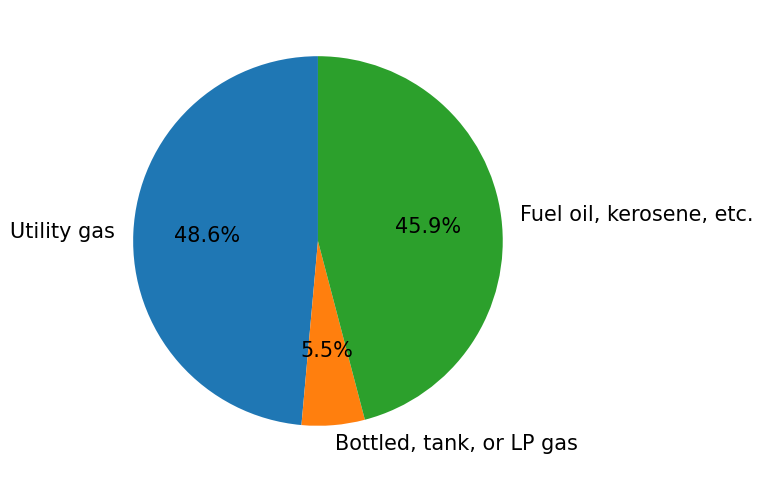

In [25]:
BSN = df_household_fuel['Bridgeport-Stamford-Norwalk, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(BSN, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
plt.savefig('../../../figures/BSN-household-fuel.png', dpi=600, bbox_inches='tight')


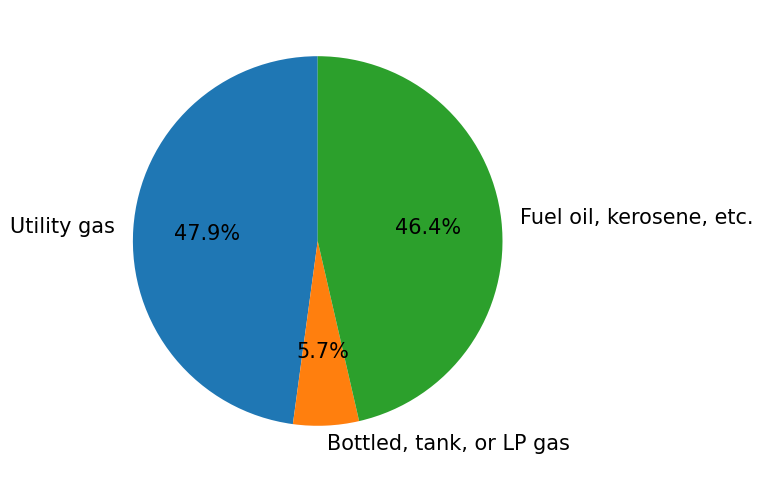

In [26]:
HEM = df_household_fuel['Hartford-East Hartford-Middletown, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(HEM, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})

plt.savefig('../../../figures/HEM-household-fuel.png', dpi=600, bbox_inches='tight')

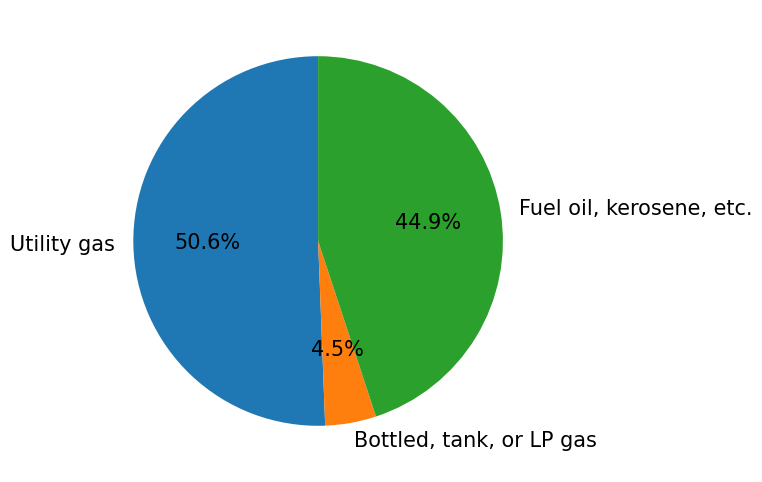

In [27]:
NHM = df_household_fuel['New Haven-Milford, CT Metro Area']
plt.figure(figsize=(6, 6))

# Plot a pie chart from the Series with labels
plt.pie(NHM, labels=df_household_fuel['Fuel type'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 15})
plt.savefig('../../../figures/NHM-household-fuel.png', dpi=600, bbox_inches='tight')


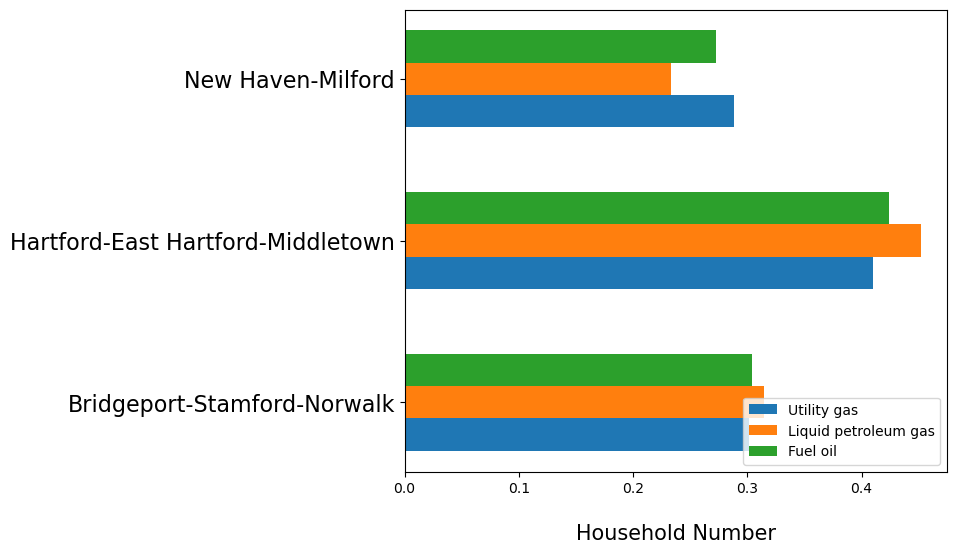

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6)) 
# Sample data
utility_gas = df_household_fuel.iloc[0][2:5]   # NH, HH, BSN
propane = df_household_fuel.iloc[1][2:5] 
fuel_oil = df_household_fuel.iloc[2][2:5]    # Add your third set of data

X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']

utility_gas = pd.to_numeric(utility_gas, errors='coerce')
propane = pd.to_numeric(propane, errors='coerce')
fuel_oil = pd.to_numeric(fuel_oil, errors='coerce')

Y_axis = np.arange(len(X))

# Set the width of the bars
bar_width = 0.2


# Normalize data
utility_gas_normalized = utility_gas / float(utility_gas.sum())
propane_normalized = propane / float(propane.sum())
fuel_oil_normalized = fuel_oil / float(fuel_oil.sum())

# Plot normalized data
plt.barh(Y_axis - bar_width, utility_gas_normalized, bar_width, label='Utility gas')
plt.barh(Y_axis, propane_normalized, bar_width, label='Liquid petroleum gas')
plt.barh(Y_axis + bar_width, fuel_oil_normalized, bar_width, label='Fuel oil')


X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']



plt.yticks(Y_axis, X)
plt.xlabel("Household Number", fontsize=15, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)
plt.legend(loc='lower right')

# Uncomment the following line to display the plot
# plt.show()

# Save the plot
plt.savefig('../../../figures/Report-images/household-fuel.png', dpi=600, bbox_inches='tight')


In [29]:
df_household_fuel.to_csv('../../../data/tidy/residential-energy-emissions.csv')

In [30]:
df_household_fuel

#calculate the residential emissions in each MSA
BSN_total_emissions = df_household_fuel["BSN Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)
HEM_total_emissions = df_household_fuel["HEM Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)
NHM_total_emissions = df_household_fuel["NHM Energy consumption"]*(df_household_fuel["CO2"]+df_household_fuel["CH4"]*25+df_household_fuel["N2O"]*298)

In [31]:
BSN_total_emissions.sum() #MTCO2e
HEM_total_emissions.sum()
NHM_total_emissions.sum()

1361020.8392503595

In [32]:
# Create a DataFrame from the Series
residential_emissions = pd.DataFrame({
    'GHG emissions (MMTCO2e)': [
        NHM_total_emissions.sum()/1000000,
        HEM_total_emissions.sum()/1000000,
        BSN_total_emissions.sum()/1000000
    ]
})
# Create a new index with the same number of elements as the original DataFrame
new_index = ['New Haven-Milford', 'Hartford-east Hartford-Middletown','Bridgeport-Stamford-Norwalk']

# Rename the row index
residential_emissions= residential_emissions.rename(index=dict(zip(residential_emissions.index, new_index)))
residential_emissions['CO2 emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["CO2"]).sum()/1000000]
residential_emissions['CH4 emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["CH4"]).sum()*25/1000000]
residential_emissions['N2O emissions (MMTCO2e)']=[(df_household_fuel["NHM Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000, (df_household_fuel["HEM Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000, (df_household_fuel["BSN Energy consumption"]*df_household_fuel["N2O"]).sum()*298/1000000]
residential_emissions
residential_emissions.to_csv('../../../data/tidy/residential-energy-emissions-breakdown.csv')

In [33]:
# Create a DataFrame from the Series
emissions = pd.DataFrame({'BSN': BSN_total_emissions/1000000, 'HEM': HEM_total_emissions/1000000, 'NHM':NHM_total_emissions/1000000})

# Create a new index with the same number of elements as the original DataFrame
new_index = ['Natural gas', 'Propane','Fuel oil','Fuel oil']

# Rename the row index
emissions= emissions.rename(index=dict(zip(emissions.index, new_index)))


In [34]:
residential_emissions
residential_emissions.to_csv('../../../data/tidy/residential-emissions-breakdown.csv')

In [35]:
column_sums = emissions.sum()

# If you want to add a new row with the column sums to the DataFrame
total_row = pd.DataFrame(column_sums).T.rename(index={0: 'Total (MMTCO2e)'})

In [36]:
emissions = pd.concat([emissions, total_row])

In [41]:
emissions
emissions.to_csv('../../../results/residential-emissions-breakdown-fuel.csv')

In [42]:
emissions

,BSN,HEM,NHM
Natural gas,0.568765,0.773233,0.543774
Propane,0.077129,0.110958,0.057276
Fuel oil,0.846248,1.180163,0.759970
Total (MMTCO2e),1.492142,2.064354,1.361021


<Figure size 1000x600 with 0 Axes>

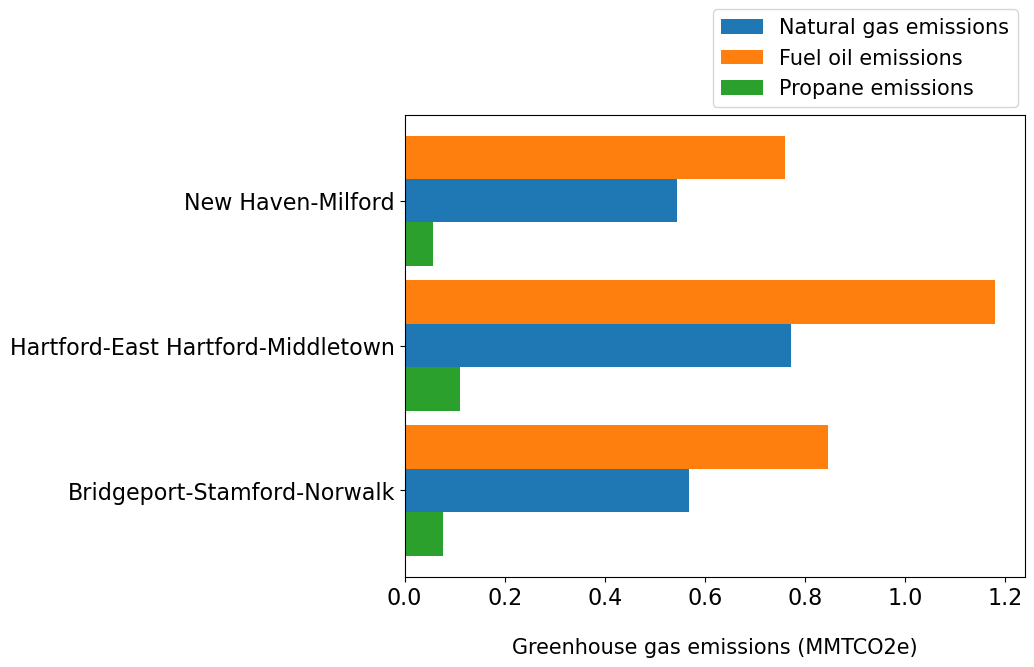

In [38]:

plt.figure(figsize=(10, 6))
X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']

NG = emissions.iloc[0][0:3]#NH, HH, BSN
Propane = emissions.iloc[1][0:3]
Fuel = emissions.iloc[2][0:3]

Y_axis = np.arange(len(X))
bar_width = 0.3  # Width of each bar

plt.figure(figsize=(8, 6))

# Plot the bars for Natural gas emissions
plt.barh(Y_axis , NG, bar_width, label='Natural gas emissions')



plt.barh(Y_axis + bar_width, Fuel , bar_width, label='Fuel oil emissions')

# Plot the bars for Propane emissions
plt.barh(Y_axis - bar_width, Propane, bar_width, label='Propane emissions')



plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse gas emissions (MMTCO2e)",fontsize=15, labelpad=20)
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)
plt.legend(loc='upper left', bbox_to_anchor=(0.48, 1.25),fontsize=15)
#plt.show()
plt.savefig('../../../figures/Report-images/residential-emissions.png', dpi=600,bbox_inches='tight')

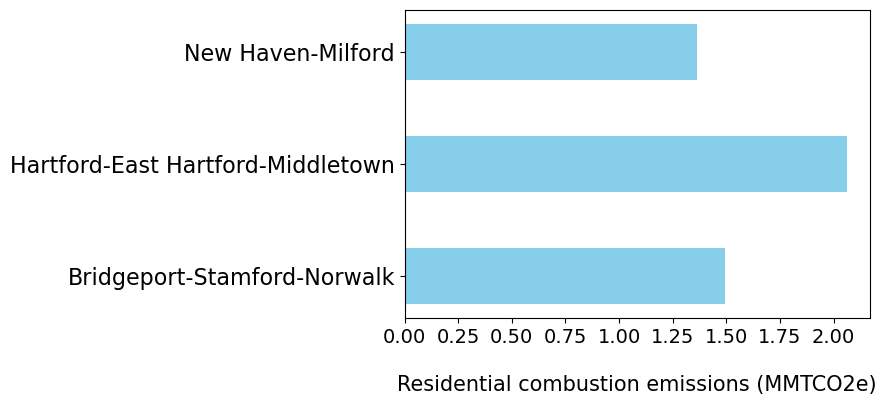

In [39]:
X = ['Bridgeport-Stamford-Norwalk','Hartford-East Hartford-Middletown', 'New Haven-Milford']
values = emissions.iloc[3]

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.barh(X, values, 0.5,color='skyblue')

# Adding labels and title

plt.xlabel('Residential combustion emissions (MMTCO2e)', fontsize=15,labelpad=20)

# Show the chart
  # Rotate the x-axis labels for better readability
plt.xticks(fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=16)
#plt.show()
plt.savefig('../../../figures/Report-images/residential-MSA-emissions.png', dpi=600,bbox_inches='tight')

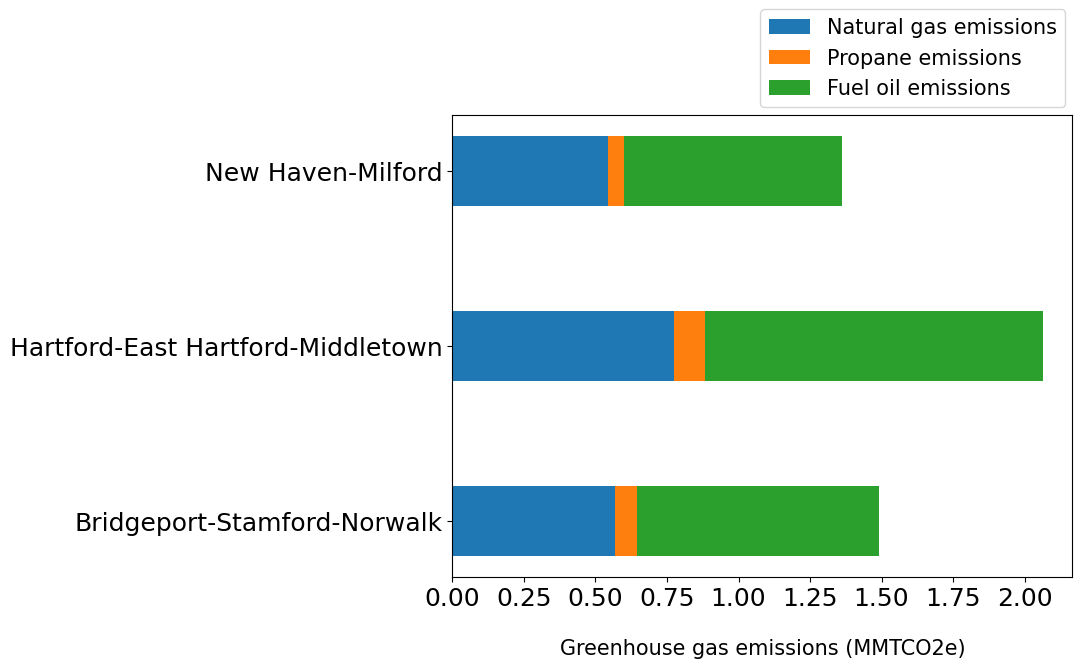

In [40]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

X = ['Bridgeport-Stamford-Norwalk', 'Hartford-East Hartford-Middletown', 'New Haven-Milford']

NG = emissions.iloc[0][0:3]  # NH, HH, BSN
Propane = emissions.iloc[1][0:3]
Fuel = emissions.iloc[2][0:3]

Y_axis = np.arange(len(X))
bar_width = 0.4  # Width of each bar

plt.barh(Y_axis, NG, bar_width, label='Natural gas emissions')
plt.barh(Y_axis, Propane, bar_width, left=NG, label='Propane emissions')
plt.barh(Y_axis, Fuel, bar_width, left=NG + Propane, label='Fuel oil emissions')

plt.yticks(Y_axis, X)  # Use yticks instead of xticks

plt.xlabel("Greenhouse gas emissions (MMTCO2e)", fontsize=15, labelpad=20)
plt.xticks(fontsize=18)  # Adjust the font size as needed
plt.yticks(fontsize=18)
plt.legend(loc='upper left', bbox_to_anchor=(0.48, 1.25), fontsize=15)

#plt.show()
plt.savefig('../../../figures/Report-images/residential-emissions.png', dpi=600,bbox_inches='tight')